# Kelly Criterion Example on Apple, Microsoft, Tesla, and S&P 500

## Not including Risk-Free Rate of Return

In [385]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from numpy.linalg import inv

First step is to download stock data from Yahoo Finance. This program works for any stock we want, I just used Apple, Microsoft, Tesla, and S&P 500 as an example.

In [386]:
df = yf.download('''
AAPL
MSFT
SPY
TSLA
AMZN
''', start = '2010-01-01')

[*********************100%***********************]  5 of 5 completed


The table below is price data for the stocks in question from 2010 to the present.

In [380]:
df

Adj Close                                                    \
                  AAPL         AMZN        MSFT         SPY         TSLA   
Date                                                                       
2010-01-04   26.466835   133.899994   24.226894   91.841896          NaN   
2010-01-05   26.512596   134.690002   24.234720   92.084984          NaN   
2010-01-06   26.090879   132.250000   24.085989   92.149803          NaN   
2010-01-07   26.042646   130.000000   23.835503   92.538841          NaN   
2010-01-08   26.215786   133.520004   23.999893   92.846756          NaN   
...                ...          ...         ...         ...          ...   
2020-07-15  390.899994  3008.870117  208.039993  321.850006  1546.010010   
2020-07-16  386.089996  2999.899902  203.919998  320.790009  1500.640015   
2020-07-17  385.309998  2961.969971  202.880005  321.720001  1500.839966   
2020-07-20  393.429993  3196.840088  211.600006  324.320007  1643.000000   
2020-07-21  388.000000  3138.290039  208.750000  325.010010  1568.359985   

                 Close                                                    ...  \
                  AAPL         AMZN        MSFT         SPY         TSLA  ...   
Date                                                                      ...   
2010-01-04   30.572857   133.899994   30.950001  113.330002          NaN  ...   
2010-01-05   30.625713   134.690002   30.959999  113.629997          NaN  ...   
2010-01-06   30.138571   132.250000   30.770000  113.709999          NaN  ...   
2010-01-07   30.082857   130.000000   30.450001  114.190002          NaN  ...   
2010-01-08   30.282858   133.520004   30.660000  114.570000          NaN  ...   
...                ...          ...         ...         ...          ...  ...   
2020-07-15  390.899994  3008.870117  208.039993  321.850006  1546.010010  ...   
2020-07-16  386.089996  2999.899902  203.919998  320.790009  1500.640015  ...   
2020-07-17  385.309998  2961.969971  202.880005  321.720001  1500.839966  ...   
2020-07-20  393.429993  3196.840088  211.600006  324.320007  1643.000000  ...   
2020-07-21  388.000000  3138.290039  208.750000  325.010010  1568.359985  ...   

                  Open                                                    \
                  AAPL         AMZN        MSFT         SPY         TSLA   
Date                                                                       
2010-01-04   30.490000   136.250000   30.620001  112.370003          NaN   
2010-01-05   30.657143   133.429993   30.850000  113.260002          NaN   
2010-01-06   30.625713   134.600006   30.879999  113.519997          NaN   
2010-01-07   30.250000   132.009995   30.629999  113.500000          NaN   
2010-01-08   30.042856   130.559998   30.280001  113.889999          NaN   
...                ...          ...         ...         ...          ...   
2020-07-15  395.959991  3080.229980  209.559998  322.410004  1543.000000   
2020-07-16  386.250000  2971.060059  205.399994  319.790009  1477.160034   
2020-07-17  387.950012  3009.000000  204.470001  321.880005  1513.449951   
2020-07-20  385.670013  3000.199951  205.000000  321.429993  1519.010010   
2020-07-21  396.690002  3232.489990  213.660004  326.450012  1639.930054   

               Volume                                             
                 AAPL      AMZN      MSFT        SPY        TSLA  
Date                                                              
2010-01-04  123432400   7599900  38409100  118944600         NaN  
2010-01-05  150476200   8851900  49749600  111579900         NaN  
2010-01-06  138040000   7178800  58182400  116074400         NaN  
2010-01-07  119282800  11030200  50559700  131091100         NaN  
2010-01-08  111902700   9830500  51197400  126402800         NaN  
...               ...       ...       ...        ...         ...  
2020-07-15   38299500   5788900  32179400   87196500  16367800.0  
2020-07-16   27644400   6394200  29940700   54622500  14300800.0  
2020-07-17 

Here, I use the price data to calculate daily returns of the stock (p_n - p_n-1). I then calculate the mean return for the data, graph both price and mean return.

In [381]:
df2 = df['Adj Close']

In [382]:
daily_returns = df2.pct_change()
#df2.plot(title = 'Stock Price Data')
#daily_returns.plot(title = 'Daily Returns')
daily_returns.mean()

AAPL    0.001164
AMZN    0.001387
MSFT    0.000937
SPY     0.000536
TSLA    0.002252
dtype: float64

Next, I calculate the covariance matrix for the stock return data, and multiply it by the amount of days we are tracking the stocks. I print out the mean return for each stock, and the covariance matrix.

In [383]:
dc = daily_returns.cov()
cov = dc * len(daily_returns)
mean = daily_returns.mean() * len(daily_returns)
print(mean)
print(cov)

AAPL    3.089406
AMZN    3.681637
MSFT    2.488543
SPY     1.422518
TSLA    5.977915
dtype: float64
          AAPL      AMZN      MSFT       SPY      TSLA
AAPL  0.802643  0.395633  0.401627  0.332207  0.463878
AMZN  0.395633  1.053781  0.433304  0.318777  0.565197
MSFT  0.401627  0.433304  0.666672  0.341631  0.453253
SPY   0.332207  0.318777  0.341631  0.314502  0.387344
TSLA  0.463878  0.565197  0.453253  0.387344  3.199565


Finally I dot the inverse of the covariance matrix and the mean return to find the Kelly leverages for each of the stocks.

In [384]:
lev = inv(cov).dot(mean)
print(final)
kc = pd.Series(lev, index = df2.columns)
kc

[ 3.10103499  2.60343335 -3.37721604  1.45880506]


AAPL    2.875742
AMZN    2.284924
MSFT    1.976333
SPY    -4.610430
TSLA    1.325971
dtype: float64

The Kelley leverages tell us the percentage of our endowment we should invest in each stock.

## With Risk-Free Rate of Return
Here the process is the same, except we subtract teh risk-free rate of return from the mean return before calculating the Kelly leverages.

In [390]:
meanrisk = (daily_returns.mean() * len(daily_returns)) - .02
meanrisk

AAPL    3.069406
AMZN    3.661637
MSFT    2.468543
SPY     1.402518
TSLA    5.957915
dtype: float64

In [393]:
levrisk = inv(cov).dot(meanrisk)
kc = pd.Series(levrisk, index = df2.columns)
kc

AAPL    2.877635
AMZN    2.284082
MSFT    1.981975
SPY    -4.683329
TSLA    1.327621
dtype: float64

# Kelly Criterion with Random Walks

Here I do the same thing, but with a Brownian motion random walk instead of stock data.

In [373]:
import numpy as np
import matplotlib.pyplot as plt
import math

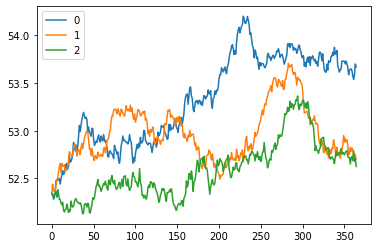

In [374]:
def brownian_path(N):
    dt_sqrt = math.sqrt(1 / N)
    Z = np.random.randn(N)
    Z[0] = 1000
    B = np.cumsum((dt_sqrt * Z) + .00159)
    return B
a = brownian_path(365)
b = brownian_path(365) 
c = brownian_path(365) 

d = np.array(list(zip(a, b, c)))
dfrand1 = pd.DataFrame(d)

dfrand1.plot()

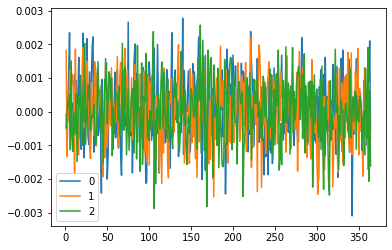

In [375]:
dfrand2 = dfrand1.pct_change()
dfrand2.plot()

In [376]:
randmean = dfrand2.mean() * 365
randcov = dfrand2.cov() * 365

In [377]:
levrand = inv(randcov).dot(randmean)
kc = pd.Series(levrand)
kc

0    68.931521
1    15.295905
2    22.408380
dtype: float64

Above are the Kelly leverages for our Brownian motion "stocks".